<a href="https://colab.research.google.com/github/RFuentesAlbornoz/MachingLearning_UTAL/blob/main/Decision_Tree_RFuentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Investigar Dataset Titanic
-Describir el Dataset
-cargar y mostrar parte del contenido (head/sample)
-Dividir Datos (Train/Test)
-Entrenar modelo
-Performance ACC - F1_score
-Visualizar arbol
-Predecir (test al azar).

Investigar Dataset Titanic y Describirlo

In [140]:
print('Es un dataset que contiene información de todos los pasajeros que se encontraban en el titanic cuando este sufrio el hundimiento. Las caracteristicas del dataset son en su mayoria categoricas y binarias, salvo la edad y el ID de cada pasajero.\nSe puede utilizar la infromación de cada pasajero para determinar si éste sobrevivió (o no) a la catastrofe, mediante un modelo de árbol de decisiones.')

Es un dataset que contiene información de todos los pasajeros que se encontraban en el titanic cuando este sufrio el hundimiento. Las caracteristicas del dataset son en su mayoria categoricas y binarias, salvo la edad y el ID de cada pasajero.
Se puede utilizar la infromación de cada pasajero para determinar si éste sobrevivió (o no) a la catastrofe, mediante un modelo de árbol de decisiones.


Cargar dataset y mostrar parte del contenido

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importa la base de datos
titanic = sns.load_dataset("titanic")
df = pd.DataFrame(titanic)
# Otra forma de importar los datos. En caso de usar este comando, dropear otras columnas, ya que no coinciden entre metodos de importación.
# URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
# df= pd.read_csv(URL)

# Elimina las columnas innecesarias/ineficientes/molestas y las filas con elementos nulos
df = df.drop(columns='embark_town') #redundante con embarked
# df = df.drop(columns='deck')
df = df.drop(columns='alive') #redundante con survivor
df = df.drop(columns='fare') #molesta
df = df.dropna() #elimina filas con elementos nulos

# Convierte las caracteristicas categoricas en caracteristicas binarias
df = pd.get_dummies(data=df)
df.head()

,survived,pclass,age,sibsp,parch,adult_male,alone,sex_female,sex_male,embarked_C,...,who_child,who_man,who_woman,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G
1,1,1,38.0,1,0,False,False,1,0,1,...,0,0,1,0,0,1,0,0,0,0
3,1,1,35.0,1,0,False,False,1,0,0,...,0,0,1,0,0,1,0,0,0,0
6,0,1,54.0,0,0,True,True,0,1,0,...,0,1,0,0,0,0,0,1,0,0
10,1,3,4.0,1,1,False,False,1,0,0,...,1,0,0,0,0,0,0,0,0,1
11,1,1,58.0,0,0,False,True,1,0,0,...,0,0,1,0,0,1,0,0,0,0


Dividir datos, crear modelo y entrenarlo

In [142]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Seleccionar variable objetivo y la característica
X= df.drop(columns='survived')
y= df.survived

#Crear modelo y realizar entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
model = DecisionTreeClassifier(max_depth=5) #Cantidad máxima de ramificaciones del arbol
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

Crear prediciones y obtener las metricas de desempeño

In [143]:
from sklearn.metrics import accuracy_score, f1_score

# Predice
y_pred = model.predict(X_test)

# Evalua las metricas de desempeño
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Muestra las estadisticas de desempeño
print("Accuracy:", round(accuracy,4))
print("F1_score:", round(f1,4))

Accuracy: 0.7568
F1_score: 0.8302


Visualizar el árbol de decisiones

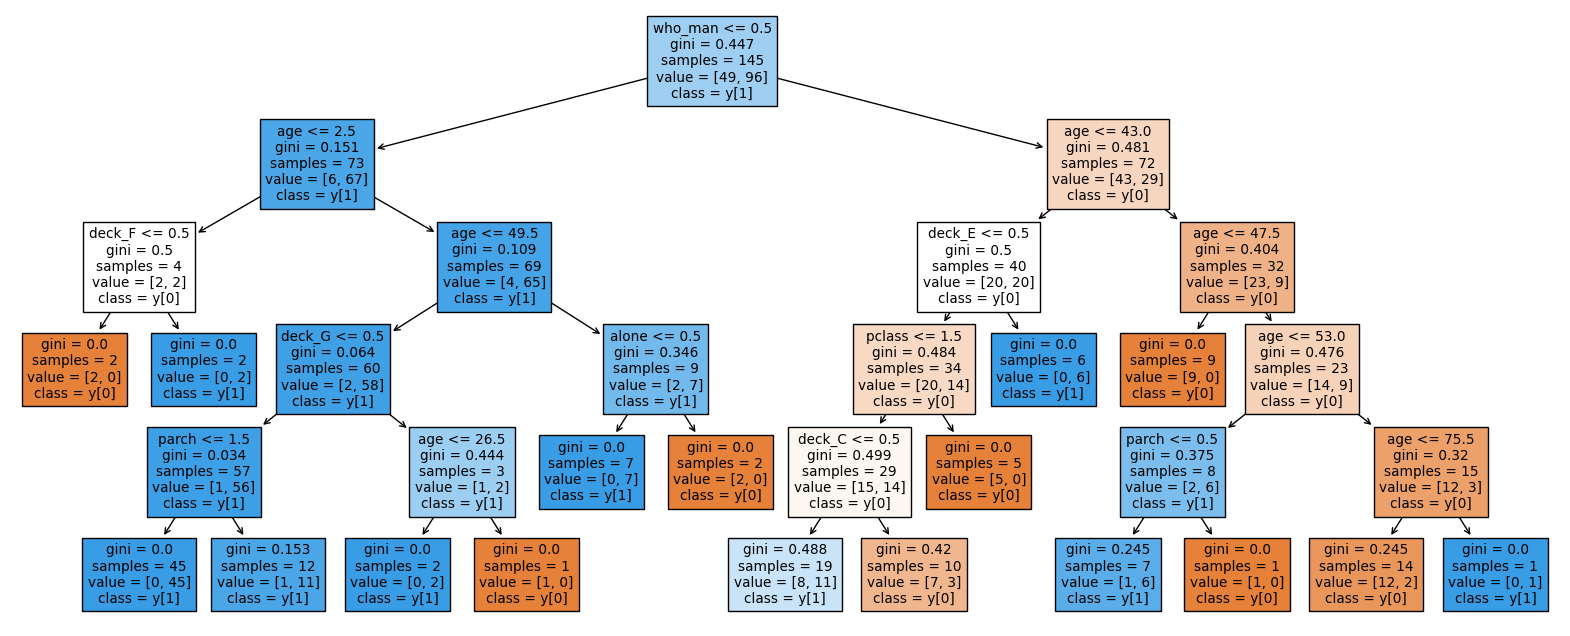

In [145]:
plt.figure(figsize=(20,8))
tree.plot_tree(model, feature_names=X.columns, class_names=True, filled = True)
plt.show()